# Import dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_excel('data_Uji EDA & ANOVA.xlsx')
dataset.head()

ModuleNotFoundError: No module named 'pandas'

## Melihat informasi dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      105 non-null    datetime64[ns]
 1   Angkatan       105 non-null    int64         
 2   Program Studi  105 non-null    object        
 3   A1             105 non-null    int64         
 4   A2             105 non-null    int64         
 5   A3             105 non-null    object        
 6   B1             105 non-null    int64         
 7   B2             105 non-null    int64         
 8   B3             105 non-null    int64         
 9   B4             105 non-null    int64         
 10  B5             105 non-null    int64         
 11  B6             105 non-null    int64         
 12  B7             105 non-null    int64         
 13  C1             105 non-null    int64         
 14  C2             105 non-null    int64         
 15  C3             105 non-

# Preprocessing
## Hapus variabel yang tidak diperlukan

In [ ]:
dataset_new = dataset.drop(columns = (['Angkatan','Timestamp', 'Program Studi', 'D4', 'A3']))
dataset_new.head()

,A1,A2,B1,B2,B3,B4,B5,B6,B7,C1,C2,C3,D1,D2,D3
0,2,3,5,5,5,3,4,3,4,3,2,4,5,4,2
1,4,4,5,5,5,4,3,3,3,4,3,4,5,5,3
2,5,5,5,4,5,5,5,1,1,5,1,1,3,5,5
3,2,2,4,4,5,4,4,2,2,1,1,1,3,2,4
4,3,4,2,5,3,2,4,2,3,4,3,3,3,3,3


# EDA

In [2]:
# Menghitung statistik deskriptif
descriptive_stats = dataset_new.describe()
descriptive_stats

NameError: name 'dataset_new' is not defined

array([[<Axes: title={'center': 'A1'}>, <Axes: title={'center': 'A2'}>,
        <Axes: title={'center': 'B1'}>, <Axes: title={'center': 'B2'}>],
       [<Axes: title={'center': 'B3'}>, <Axes: title={'center': 'B4'}>,
        <Axes: title={'center': 'B5'}>, <Axes: title={'center': 'B6'}>],
       [<Axes: title={'center': 'B7'}>, <Axes: title={'center': 'C1'}>,
        <Axes: title={'center': 'C2'}>, <Axes: title={'center': 'C3'}>],
       [<Axes: title={'center': 'D1'}>, <Axes: title={'center': 'D2'}>,
        <Axes: title={'center': 'D3'}>, <Axes: >]], dtype=object)

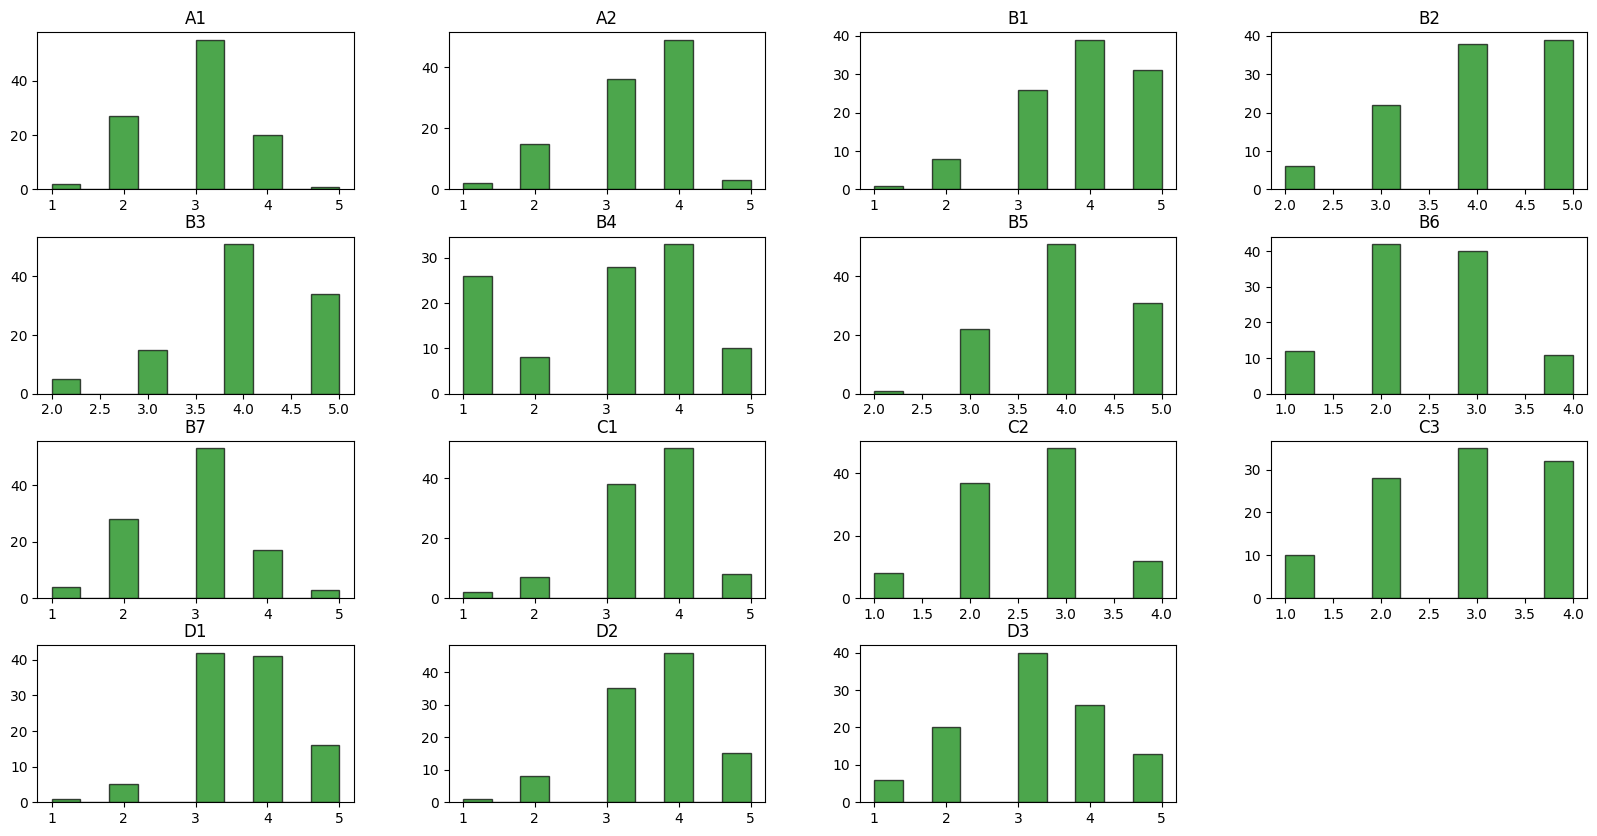

In [ ]:
# Visualisasi data
#Visualisasi histogram dari setiap pertannyaan
dataset_new.hist(figsize=(20,10),alpha = 0.7, color = 'green',edgecolor ='black',grid=False)

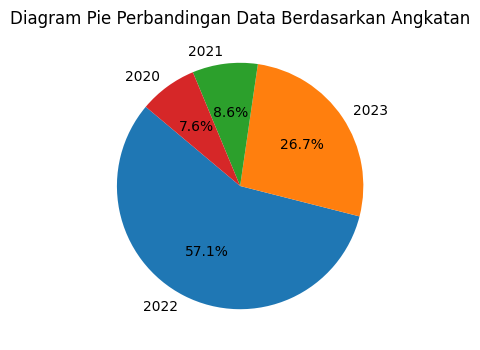

In [ ]:
import matplotlib.pyplot as plt

# Membaca dataset dari file Excel
data = pd.read_excel("data_Uji EDA & ANOVA.xlsx")

# Menghitung jumlah data untuk setiap Angkatan
counts = data['Angkatan'].value_counts()

# Menghitung total data
total_data = len(data)

# Menghitung persentase masing-masing Angkatan
percentages = (counts / total_data) * 100

# Membuat diagram pie
plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title("Diagram Pie Perbandingan Data Berdasarkan Angkatan")
plt.show()

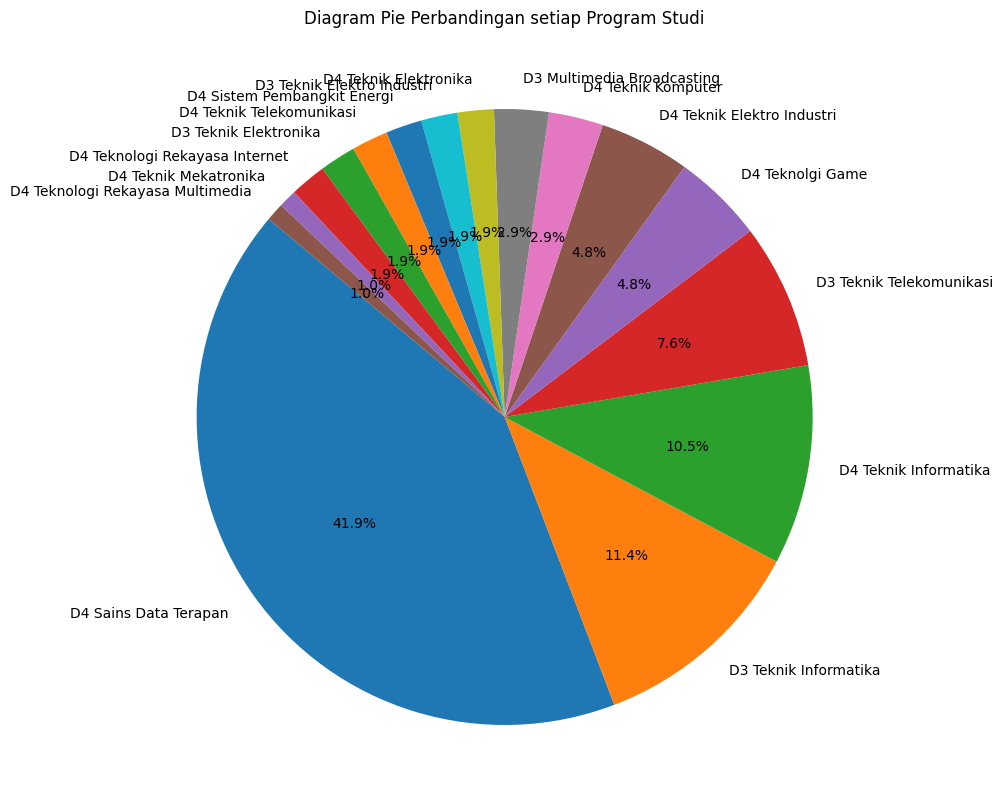

In [ ]:
# Menghitung jumlah data untuk setiap Program Studi
counts = data['Program Studi'].value_counts()

# Menghitung total data A3
total_data = len(data)

# Menghitung persentase masing-masing Angkatan
percentages = (counts / total_data) * 100

# Membuat diagram pie
plt.figure(figsize=(10, 10))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title("Diagram Pie Perbandingan setiap Program Studi")
plt.show()

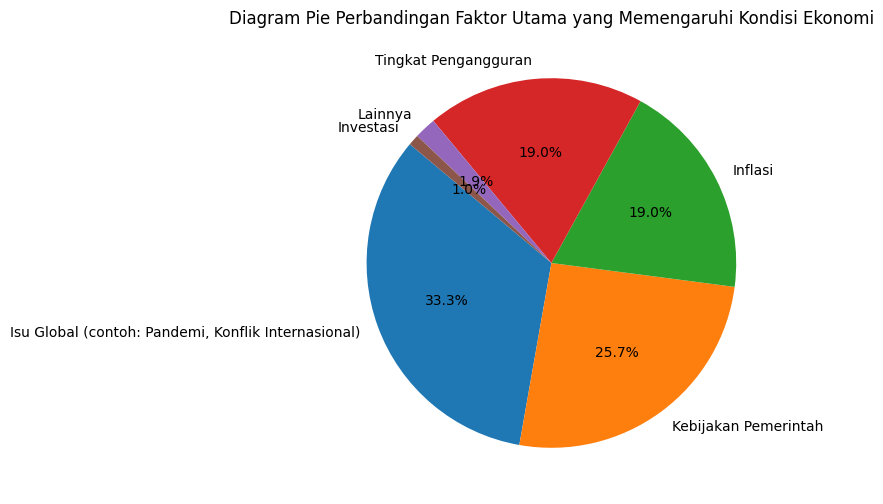

In [ ]:
# Menghitung jumlah data A3 untuk setiap Angkatan
counts = data['A3'].value_counts()

# Menghitung total data A3
total_data_A3 = len(data)

# Menghitung persentase masing-masing Angkatan
percentages = (counts / total_data) * 100

# Membuat diagram pie
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title("Diagram Pie Perbandingan Faktor Utama yang Memengaruhi Kondisi Ekonomi")
plt.show()

# ANOVA (Analysis of Variance)

In [ ]:
# ANOVA (Analysis of Variance):
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Baca data dari file Excel
df = pd.read_excel('data_Uji EDA & ANOVA.xlsx')

# Buang kolom yang tidak diperlukan
df = df.drop(columns=['Timestamp', 'Program Studi', 'D4', 'A3'])

# Misalkan kita memiliki beberapa kelompok
angkatan_2020 = df[df["Angkatan"] == 2020]
angkatan_2021 = df[df["Angkatan"] == 2021]
angkatan_2022 = df[df["Angkatan"] == 2022]
angkatan_2023 = df[df["Angkatan"] == 2023]

# Daftar variabel yang ingin diuji
variabels = ['A1', 'A2', 'B1', 'B2', 'B3',	'B4', 'B5',	'B6', 'B7',	'C1', 'C2',	'C3', 'D1',	'D2', 'D3']

# Inisialisasi list untuk menyimpan hasil uji perbandingan ganda
results = []

# Lakukan uji ANOVA untuk setiap variabel
for variabel in variabels:
    f_statistic, p_value = stats.f_oneway(
        angkatan_2020[variabel],
        angkatan_2021[variabel],
        angkatan_2022[variabel],
        angkatan_2023[variabel]
    )
    
    print(f"Variabel {variabel}:")
    print("Nilai F-statistic:", f_statistic)
    print("Nilai p-value:", p_value)
    
    # Misalkan alpha adalah tingkat signifikansi yang Anda tentukan
    alpha = 0.1

    if p_value < alpha:
        print("Terdapat perbedaan yang signifikan untuk variabel", variabel)
        
        # Melakukan uji perbandingan ganda (Tukey's HSD)
        tukey = pairwise_tukeyhsd(df[variabel], df["Angkatan"], alpha=alpha)
        results.append(tukey.summary())
        
    else:
        print("Tidak terdapat perbedaan yang signifikan untuk variabel", variabel)


Variabel A1:
Nilai F-statistic: 0.5605163060422772
Nilai p-value: 0.6423016434883467
Tidak terdapat perbedaan yang signifikan untuk variabel A1
Variabel A2:
Nilai F-statistic: 0.9915170172738155
Nilai p-value: 0.40002467162446076
Tidak terdapat perbedaan yang signifikan untuk variabel A2
Variabel B1:
Nilai F-statistic: 0.8814726958240674
Nilai p-value: 0.4534308726571321
Tidak terdapat perbedaan yang signifikan untuk variabel B1
Variabel B2:
Nilai F-statistic: 1.7661675363261438
Nilai p-value: 0.15843201222380468
Tidak terdapat perbedaan yang signifikan untuk variabel B2
Variabel B3:
Nilai F-statistic: 2.942376004266884
Nilai p-value: 0.0366681173535668
Terdapat perbedaan yang signifikan untuk variabel B3
Variabel B4:
Nilai F-statistic: 0.45039534233340967
Nilai p-value: 0.7175700136964662
Tidak terdapat perbedaan yang signifikan untuk variabel B4
Variabel B5:
Nilai F-statistic: 2.4553999096249437
Nilai p-value: 0.0674225310204494
Terdapat perbedaan yang signifikan untuk variabel B5
Va

In [ ]:
# Menampilkan hasil uji perbandingan ganda
for result in results:
    print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.10 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2020   2021  -1.0694 0.0313 -1.9584 -0.1805   True
  2020   2022  -0.5917 0.1969 -1.2803  0.0969  False
  2020   2023  -0.4107 0.5652 -1.1442  0.3227  False
  2021   2022   0.4778 0.3313 -0.1762  1.1318  False
  2021   2023   0.6587 0.1355 -0.0423  1.3598  False
  2022   2023    0.181 0.7479 -0.2378  0.5997  False
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.10
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  2020   2021  -0.1667 0.9645 -0.9813  0.648  False
  2020   2022  -0.5833 0.1459 -1.2144 0.0477  False
  2020   2023  -0.3214 0.6842 -0.9935 0.3507  False
  2021   2022  -0.4167 0.3755  -1.016 0.1826  False
  2021   2023  -0.1548 0.9438 -0.7972 0.4876  False
  2022   2023   0.2619 0.3921 -0.1218 0.6456  False
--